# Новый анализ

In [35]:
import pandas as pd

# Загрузка данных
data_path = './data/clean_data.csv'
data = pd.read_csv(data_path)

In [36]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных для PCA и t-SNE
features = data.iloc[:, 1:]  # Предполагая, что ответы на вопросы начинаются с 3 колонки
# print(features.head())
features_scaled = StandardScaler().fit_transform(features.fillna(0))

In [34]:
from sklearn.metrics import silhouette_score

# Определение значений силуэта для разного числа кластеров
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=420, n_init='auto')
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    print(f"Для n_clusters = {n_clusters} средний silhouette score равен: {silhouette_avg}")

Для n_clusters = 2 средний silhouette score равен: 0.14287880828654195
Для n_clusters = 3 средний silhouette score равен: 0.13879651623337008
Для n_clusters = 4 средний silhouette score равен: 0.08258601861598251
Для n_clusters = 5 средний silhouette score равен: 0.0714051253225394


In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение оптимального числа кластеров
optimal_clusters = 2  # из предыдущего анализа
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(features_scaled)

Разбивка на кластеры завершена.


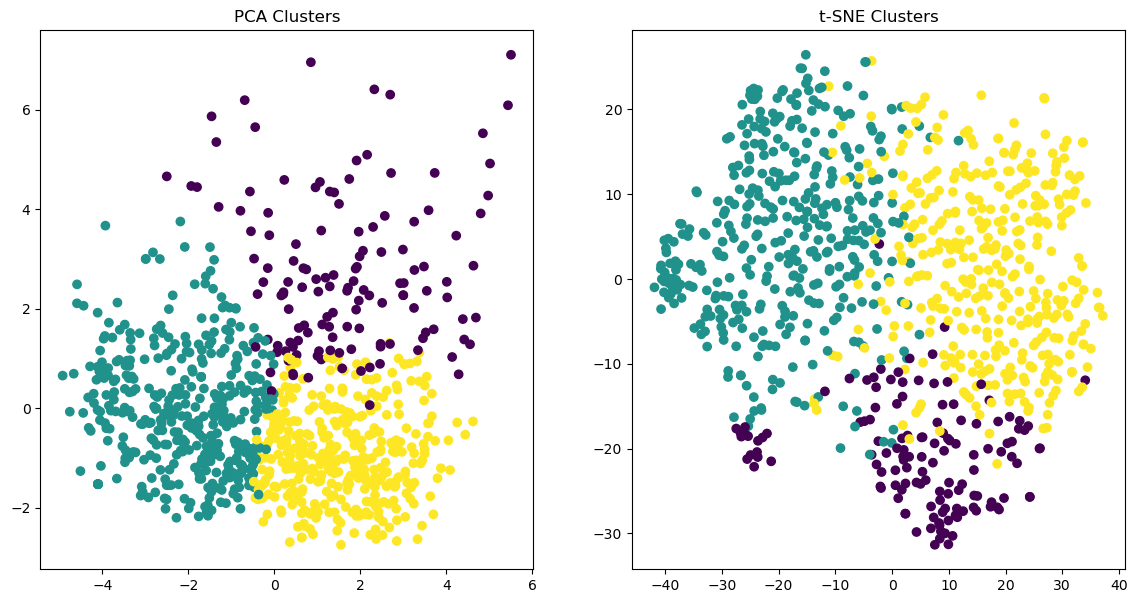

Визуализация завершена.


In [27]:
# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=342)
tsne_results = tsne.fit_transform(features_scaled)

# Визуализация PCA и t-SNE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster'])
plt.title('PCA кластеры')
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster'])
plt.title('t-SNE кластеры')
plt.show()

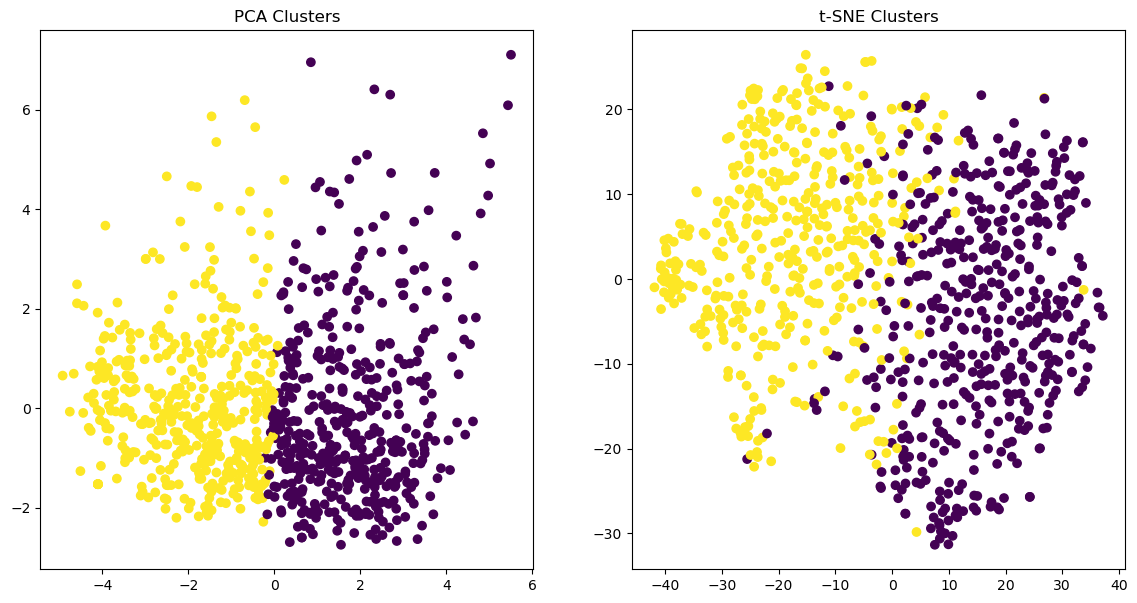

In [37]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(features_scaled)


# Применение PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=342)
tsne_results = tsne.fit_transform(features_scaled)

# Визуализация PCA и t-SNE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=data['Cluster'])
plt.title('PCA Clusters')
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Cluster'])
plt.title('t-SNE Clusters')
plt.show()